In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
t0 = 0
g = 9.81
l, m = 1, 1
omega = np.sqrt(g / l) #NB; we will use omega as a helping constant, and thetaDot as the time-derivative of the angle
theta0 = 0.2
thetaDot0 = 0
u0 = np.array((theta0, thetaDot0))

def f(t, u): #differential equation. u = [theta, thetaDot]
    return np.array([u[1], - omega**2 *u[0]]) 


def ec_g(t, u): #differential equation for the Euler-Cromer method.
    return - omega**2 * u[0]

def Energy(Y): #Y is array containing vectors with theta, thetaDot at different times
    return Pot(Y) + Kin(Y)

def Pot(Y):
    return  m * g * l * Y.T[0]**2 / 2

def Kin(Y):
    return 0.5 * m * ( l * Y.T[1])**2



In [11]:
def Kutta4(f, u0, t0, tNum, dt):
    U = np.zeros( ((tNum),  u0.size) )
    U[0] = u0
    for i in range(1 ,tNum):
        F1 = f(i * dt, U[i-1])
        F2 = f(i * dt + dt / 2, U[i-1] + dt  / 2 * F1)
        F3 = f(i * dt + dt / 2, U[i-1] + dt / 2 * F2)
        F4 = f(i * dt + dt, U[i-1] + dt * F3)
        U[i] = U[i-1] + dt / 6 * (F1 + 2* F2 + 2 * F3 + F4)        
    return U

def EulersMethod(f, u0, t0, tNum, dt ):
    #tf = t0 + dt * tNum
    U = np.zeros(( tNum, 2))
    U[0] = u0
    for i in range(1, tNum):
        U[i] = U[i-1] + f(i * dt, U[i-1]) * dt  
    return U

def Euler_Cromer(g, u0, t0, tNum, dt):
    U = np.zeros((tNum, 2))
    U[0] = u0
    for i in range(1, tNum):
        U[i][1] = U[i-1][1] + g(0, U[i-1]) * dt
        U[i][0] = U[i-1][0] + U[i][1] * dt
    return U

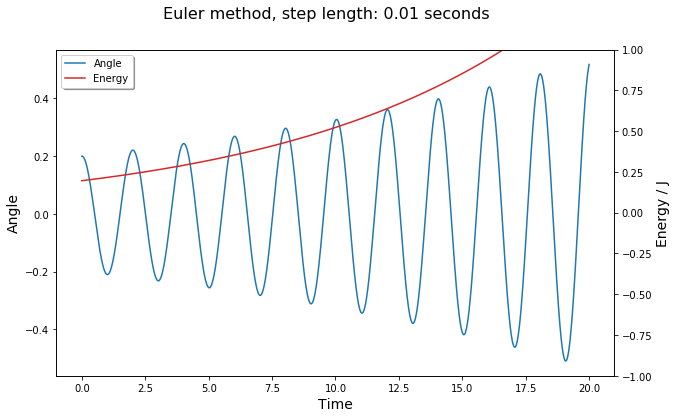

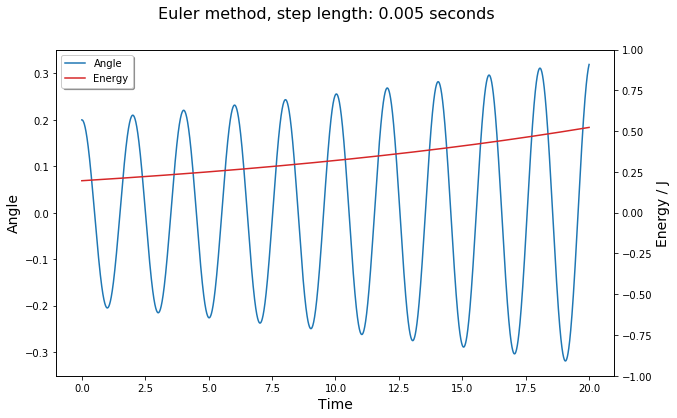

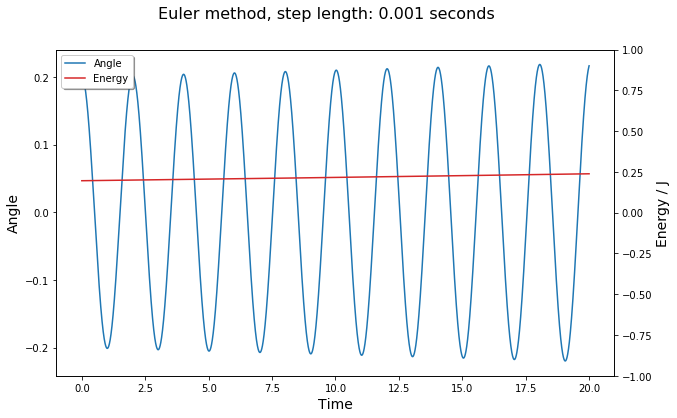

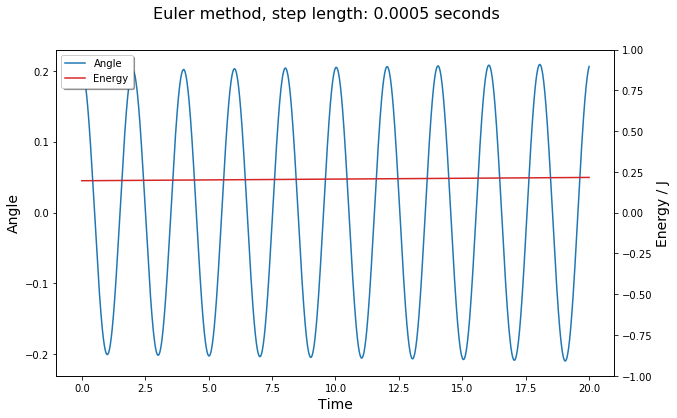

NameError: name 'ax1' is not defined

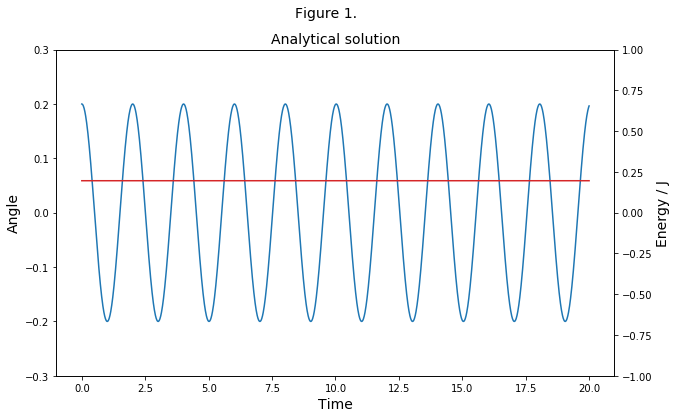

In [12]:
def plot_euler(f, u0, t0, tNum, dt):
    Y = EulersMethod(f, u0 , t0 , tNum , dt )
    T = np.linspace(t0, t0 + dt * tNum, tNum)
    
    fig, ax  = plt.subplots()
    fig.set_size_inches(10, 6)
    fig.suptitle("Euler method, step length: " + str(dt) + " seconds", fontsize = 16)
    
    l, = ax.plot(T, Y.T[0]) #Plotter vinkelen mot tiden
    #ax.set_title("Euler method", fontsize = 14)
    ax.set_xlabel("Time", fontsize = 14)
    ax.set_ylabel("Angle", fontsize = 14)
    #ax1.set(ylim = (-0.3, 0.3))
    
    ax2 = ax.twinx() #Ny axis som deler x-akse med ax1
    l2, = ax2.plot(T, Energy(Y), color = 'tab:red')
    ax2.set_ylabel("Energy / J", fontsize = 14)
    ax2.set(ylim = (-1, 1))
    ax.legend((l, l2), ('Angle', 'Energy'), loc='upper left', shadow=True)#legend for ax1 og ax2
    plt.show()

def plot_analytic(u0, tNum, dt):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    fig.suptitle("Figure 1.", fontsize = 14)
    ax.set_title("Analytical solution", fontsize = 14)
    ax.set_xlabel("Time", fontsize = 14)
    ax.set_ylabel("Angle", fontsize = 14)
    YA = np.zeros((tNum, 2))
    T = np.linspace(t0, t0 + dt * tNum, tNum)
    YA[:, 0] = u0[0] * np.cos(omega * T)
    YA[:, 1] = - u0[0] * omega * np.sin(omega * T)
    l, = ax.plot(T, YA.T[0]) #Analytical solution
    ax.set(ylim = (-0.3, 0.3))
    
    ax2 = ax.twinx()
    l2, = ax2.plot(T, Energy(YA), color = "tab:red" )
    ax2.set(ylim = (-1, 1))
    ax2.set_ylabel("Energy / J", fontsize = 14)
    ax1.legend((l3, l4), ("Angle", "Energy"), loc = "upper left")
    plt.show()



plot_euler(f, u0, t0, tNum =2000,dt = 0.01)
plot_euler(f, u0, t0, tNum =4000,dt = 0.005)
plot_euler(f, u0, t0, tNum =20000,dt = 0.001)
plot_euler(f, u0, t0, tNum =40000,dt = 0.0005)
plot_analytic(u0, tNum = 2000, dt = 0.01)

### Diskusjon oppgave 1
Initial conditions of $\theta = 0.2$ and $\dot{\theta} = 0$ results in the motion and energy shown in the upper graph of figure 1, calculated from the Euler method on the small angle approximation differential equation of the pendulum. This is done for different time steps. The analytical small angle-solution is also shown. Over a period of 20 seconds the Euler method gives satisfactory results for time steps smaller that approximatly 0.001 seconds, as shown in the figure.For time steps bigger than this, the motion and the pendulum increases, as the Euler method overshoots the motion of the pendulum. 


# Oppgave 2

In [ ]:
def plot_comparison(u0,t0,tNum,dt):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(30, 10)
    
    T = np.linspace(t0, t0 + dt * tNum, tNum)
    
    ax1.set_title("Euler Method, Step Length: " + str(dt), fontsize = 18)
    ax1.set_xlabel("Time", fontsize = 18)
    ax1.set_ylabel("Angle", fontsize = 18)
    UE = EulersMethod(f, u0 , t0 , tNum , dt )
    l1, = ax1.plot(T,UE.T[0])
    
    ax11 = ax1.twinx()
    l11, = ax11.plot(T, Energy(UE), color = "tab:red" )
    ax11.set(ylim = (-1, 1))
    ax11.set_ylabel("Energy / J", fontsize = 18)
    ax1.legend((l1, l11), ("Angle", "Energy"), loc = "upper left", fontsize = 18)
    
    
    ax2.set_title("RK4, Step Length: " + str(dt), fontsize = 18)
    ax2.set_xlabel("Time", fontsize = 18)
    ax2.set_ylabel("Angle", fontsize = 18)
    UK = Kutta4(f, u0, t0, tNum,  dt)
    l2 = ax2.plot(T, UK.T[0])
    
    ax22 = ax2.twinx()
    l22, = ax22.plot(T, Energy(UK), color = "tab:red" )
    ax22.set(ylim = (-1, 1))
    ax22.set_ylabel("Energy / J", fontsize = 18)
    ax2.legend((l1, l11), ("Angle", "Energy"), loc = "upper left", fontsize = 18)
    
    
    ax3.set_title("Euler-Cromer, Step Length: " + str(dt), fontsize = 18)
    ax3.set_xlabel("Time", fontsize = 18)
    ax3.set_ylabel("Angle", fontsize = 18)
    UE_C = Euler_Cromer(ec_g, u0, t0, tNum,dt)
    ax3.plot(T,UE_C.T[0])
    
    ax33 = ax3.twinx()
    l33, = ax33.plot(T, Energy(UE_C), color = "tab:red" )
    ax33.set(ylim = (-1, 1))
    #ax33.set_ylabel("Energy / J", fontsize = 14, position = ( - 1, 1 ))
    ax3.legend((l1, l11), ("Angle", "Energy"), loc = "upper left", fontsize = 18)
    
    plt.tight_layout()
    plt.show()
    
tNum2, dt2 = 20000, 0.001
plot_comparison(u0,t0,tNum2, dt2)

tNum2, dt2 = 200, 0.1
plot_comparison(u0,t0,tNum2, dt2)

tNum2, dt2 = 40, 0.5
plot_comparison(u0,t0,tNum2, dt2)
    

## Discussion excercise 2
The figure above shows the angle and Energy of the simple pendulum plotted against time. The three methods: eulers method, Runge-Kutta-4(RK4) and euler-Cromer are compared horisontaly and three different step sizes: $0.001s$ , $0.1s$ and $0.5s$
are shown vertically. 

The step size $0.001s$ gives a stable harmonic motion for all the methods. The step size $0.1s$ gives stable harmonic motion for runge kutta 4 and Euler-Cromer but a diverging motion for eulers method. The energy for the runge kutta method is stable and the energy for euler-cromer oscilates about the correct value. For the step size $0.5s$ RK4-method results in decreasing amplitude and energy while euler-chromer-method results in stable amplitude and energy, but with large oscilations in the energy.

In [ ]:
def plot_phase_comparison(u0,t0,tNum,dt):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(25, 5)
    
    T = np.linspace(t0, t0 + dt * tNum, tNum)
    
    ax1.set_title("Euler Method, Step Length: " + str(dt))
    ax1.set_xlabel("Angle")
    ax1.set_ylabel("Angular Velocity")
    UE = EulersMethod(f, u0 , t0 , tNum , dt )
    ax1.plot(UE.T[0],UE.T[1])
    
    ax2.set_title("RK4, Step Length: " + str(dt))
    ax2.set_xlabel("Angle")
    ax2.set_ylabel("Angular velocity")
    UK = Kutta4(f, u0,t0, tNum, dt)
    ax2.plot(UK.T[0], UK.T[1])
    
    ax3.set_title("Euler-Cromer, Step Length: " + str(dt))
    ax3.set_xlabel("Angle")
    ax3.set_ylabel("Angular Velocity")
    UE_C = Euler_Cromer(ec_g, u0, t0, tNum,dt)
    ax3.plot(UE_C.T[0],UE_C.T[1])
    plt.show()

tNum3, dt3 = 200000, 0.001
plot_phase_comparison(u0,t0,tNum3,dt3)

tNum3, dt3 = 2000, 0.1
plot_phase_comparison(u0,t0,tNum3,dt3)

tNum3, dt3 = 400, 0.5
plot_phase_comparison(u0,t0,tNum3,dt3)

The figure above shows the angular velocity plotted against the angle for the three methods and the different step sizes: $0.001s$ , $0.1s$ and $0.5s$. RK4 and Euler-Cromer give the correct result for time step $0.001s$. For time step $0.1s$ RK4 results in aproximately the correct result while Euler-Cromer results in a oval that is slightly tilted. For the time step $0.5s$ RK4 results in a spiral in phase space, corresponing to the reduction of energy. Euler-Cromer with time steps $0.5s$ gives a even more tilted oval than for time step $0.1s$.

Based on the angle-time and angle-angular-velocity plots RK4 gives satisfactory results at time step $0.1s$. The angle-time plot for euler-cromer with time step $0.1s$ is identical to the analytical result, therfore the time step is sufficent. Because of the oscilation of the energy and the tilt in phase space, euler-cromer gives inferior results to RK4.